In [1]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

In [2]:
def phi(x):
    return 1 if 0 <= x <= 1 else 0

In [3]:
def psi_ij(x, j, i):
    start = i * 2 ** (-j)
    end = (i + 1) * 2 ** (-j)
    half_interval = 0.5 * 2 ** (-j)
    scale = 2 ** (j / 2)
    
    if start <= x < start + half_interval:
        return scale
    elif start + half_interval <= x <= end:
        return -scale
    else:
        return 0

In [4]:
def compute_dij(f, j, i):
    left = i * 2 ** (-j)
    med = (i + 0.5) * 2 ** (-j)
    right = (i + 1) * 2 ** (-j)
    
    integral = quad(lambda x: f(x) * psi_ij(x, j, i), left, right)[0]
    return integral

In [5]:
def decompose_row(sample, row_index, j_max):
    num_cols = len(sample[row_index])
    d_ij_row = {}
    row_func = lambda x: sample[row_index][int(x * (num_cols - 1))]
    
    for j in range(j_max + 1):
        for i in range(2 ** j):
            d_ij_row[(j, i)] = compute_dij(row_func, j, i)
    return d_ij_row

In [6]:
def decompose_column(sample, col_index, j_max):
    num_rows = len(sample)
    d_ij_col = {}
    col_func = lambda x: sample[int(x * (num_rows - 1))][col_index]
    
    for j in range(j_max + 1):
        for i in range(2 ** j):
            d_ij_col[(j, i)] = compute_dij(col_func, j, i)
    return d_ij_col

In [7]:
def standard_decomposition(sample, j_max):
    num_rows, num_cols = len(sample), len(sample[0])
    
    row_coefficients = []
    for row_index in range(num_rows):
        row_coefficients.append(decompose_row(sample, row_index, j_max))
    
    column_coefficients = []
    for col_index in range(num_cols):
        column_coefficients.append(decompose_column(sample, col_index, j_max))
    
    return row_coefficients, column_coefficients

In [8]:
six = [[1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0], 
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 1],
       [1, 1, 1, 1, 1, 1, 1, 1]]

seven = [[1, 1, 1, 1, 1, 1, 1, 1], 
         [0, 0, 0, 0, 0, 0, 1, 0],
         [0, 0, 0, 0, 0, 1, 0, 0],
         [0, 0, 0, 0, 1, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0, 0],
         [0, 0, 1, 0, 0, 0, 0, 0],
         [0, 1, 0, 0, 0, 0, 0, 0],
         [1, 0, 0, 0, 0, 0, 0, 0]]

four = [[1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 1]]


In [9]:
samples = {
    "six": six,
    "seven": seven,
    "four": four
}
j_max = 2

For six sample row_coeffs is [{(0, 0): 0.0, (1, 0): 0.0, (1, 1): 0.0, (2, 0): 0.0, (2, 1): 0.0, (2, 2): 0.0, (2, 3): 0.0}, {(0, 0): 0.14285714285714288, (1, 0): 0.20203050891044214, (1, 1): 0.0, (2, 0): 0.21428571428571433, (2, 1): 0.0, (2, 2): 0.0, (2, 3): 0.0}, {(0, 0): 0.14285714285714288, (1, 0): 0.20203050891044214, (1, 1): 0.0, (2, 0): 0.21428571428571433, (2, 1): 0.0, (2, 2): 0.0, (2, 3): 0.0}, {(0, 0): 0.0, (1, 0): 0.0, (1, 1): 0.0, (2, 0): 0.0, (2, 1): 0.0, (2, 2): 0.0, (2, 3): 0.0}, {(0, 0): 0.14285714285714288, (1, 0): 0.20203050891044214, (1, 1): 0.0, (2, 0): 0.21428571428571433, (2, 1): 0.0, (2, 2): 0.0, (2, 3): 0.0}, {(0, 0): 0.14285714285714288, (1, 0): 0.20203050891044214, (1, 1): 0.0, (2, 0): 0.21428571428571433, (2, 1): 0.0, (2, 2): 0.0, (2, 3): 0.0}, {(0, 0): 0.14285714285714288, (1, 0): 0.20203050891044214, (1, 1): 0.0, (2, 0): 0.21428571428571433, (2, 1): 0.0, (2, 2): 0.0, (2, 3): 0.0}, {(0, 0): 0.0, (1, 0): 0.0, (1, 1): 0.0, (2, 0): 0.0, (2, 1): 0.0, (2, 2): 0.0, 

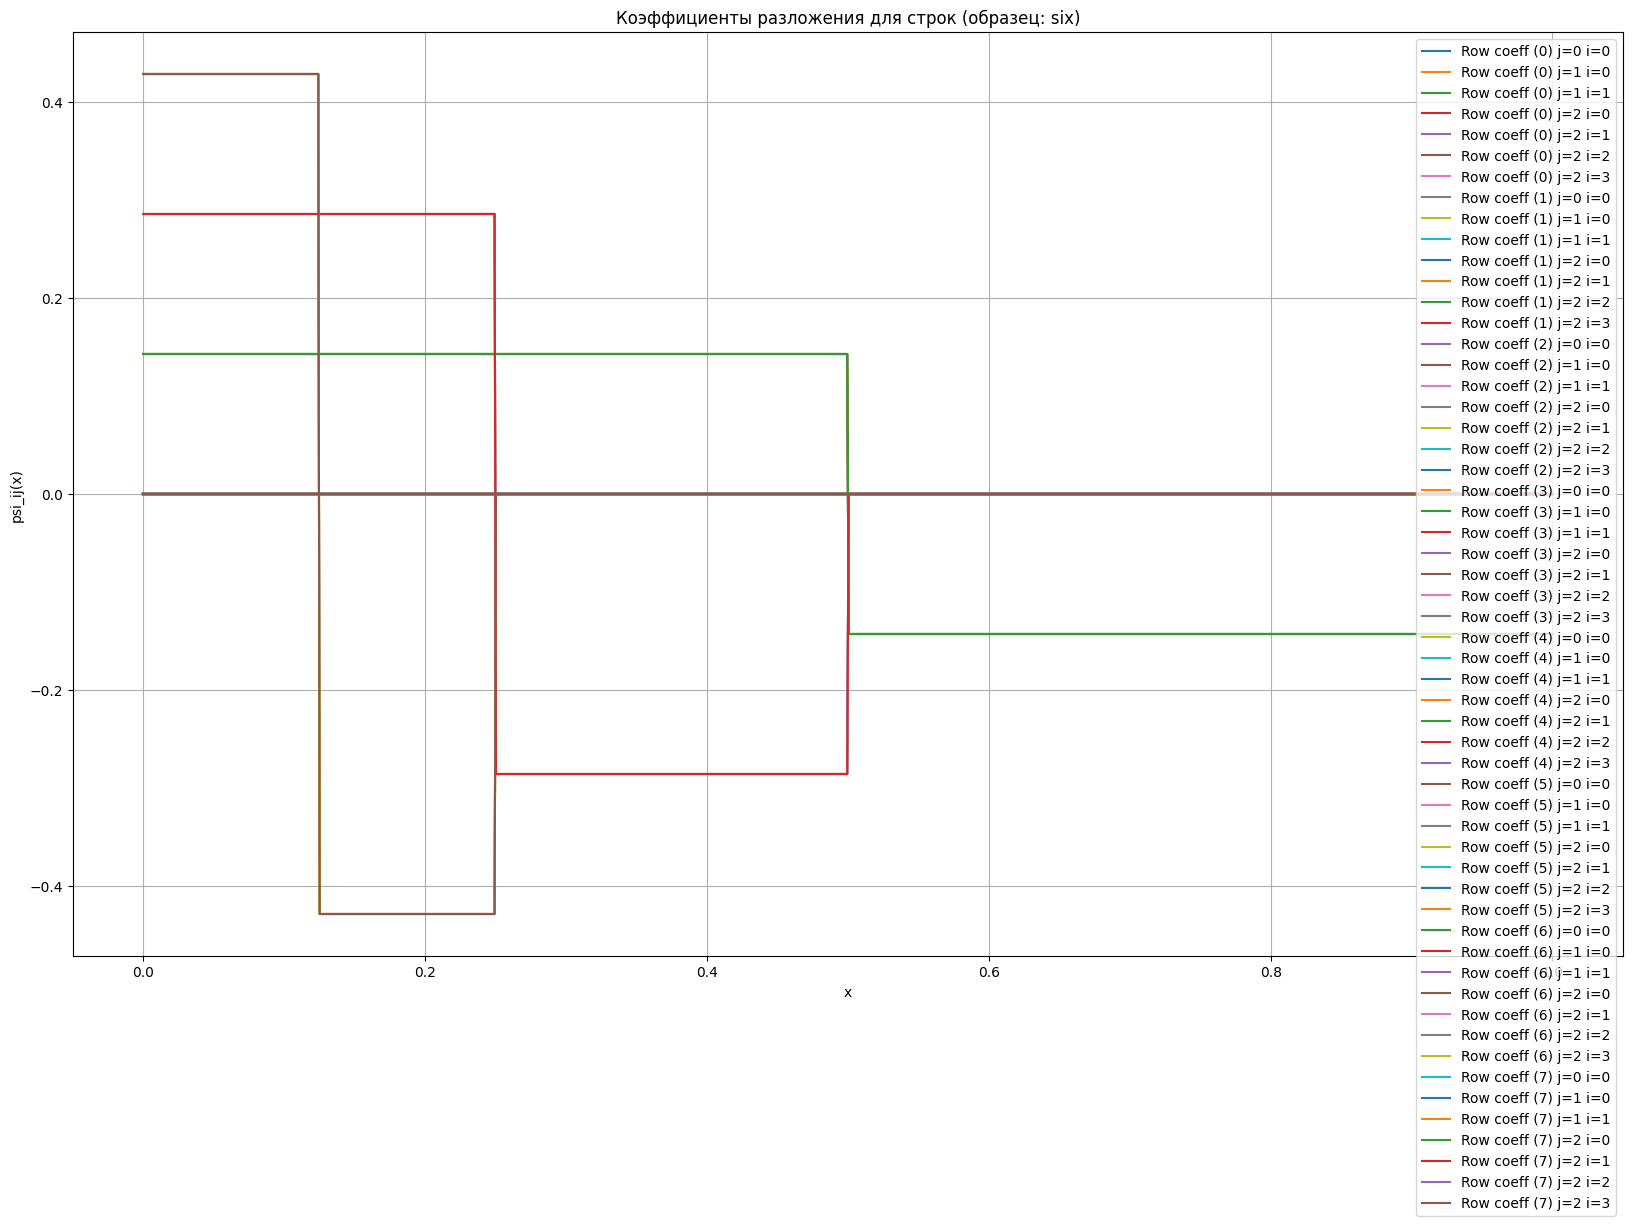

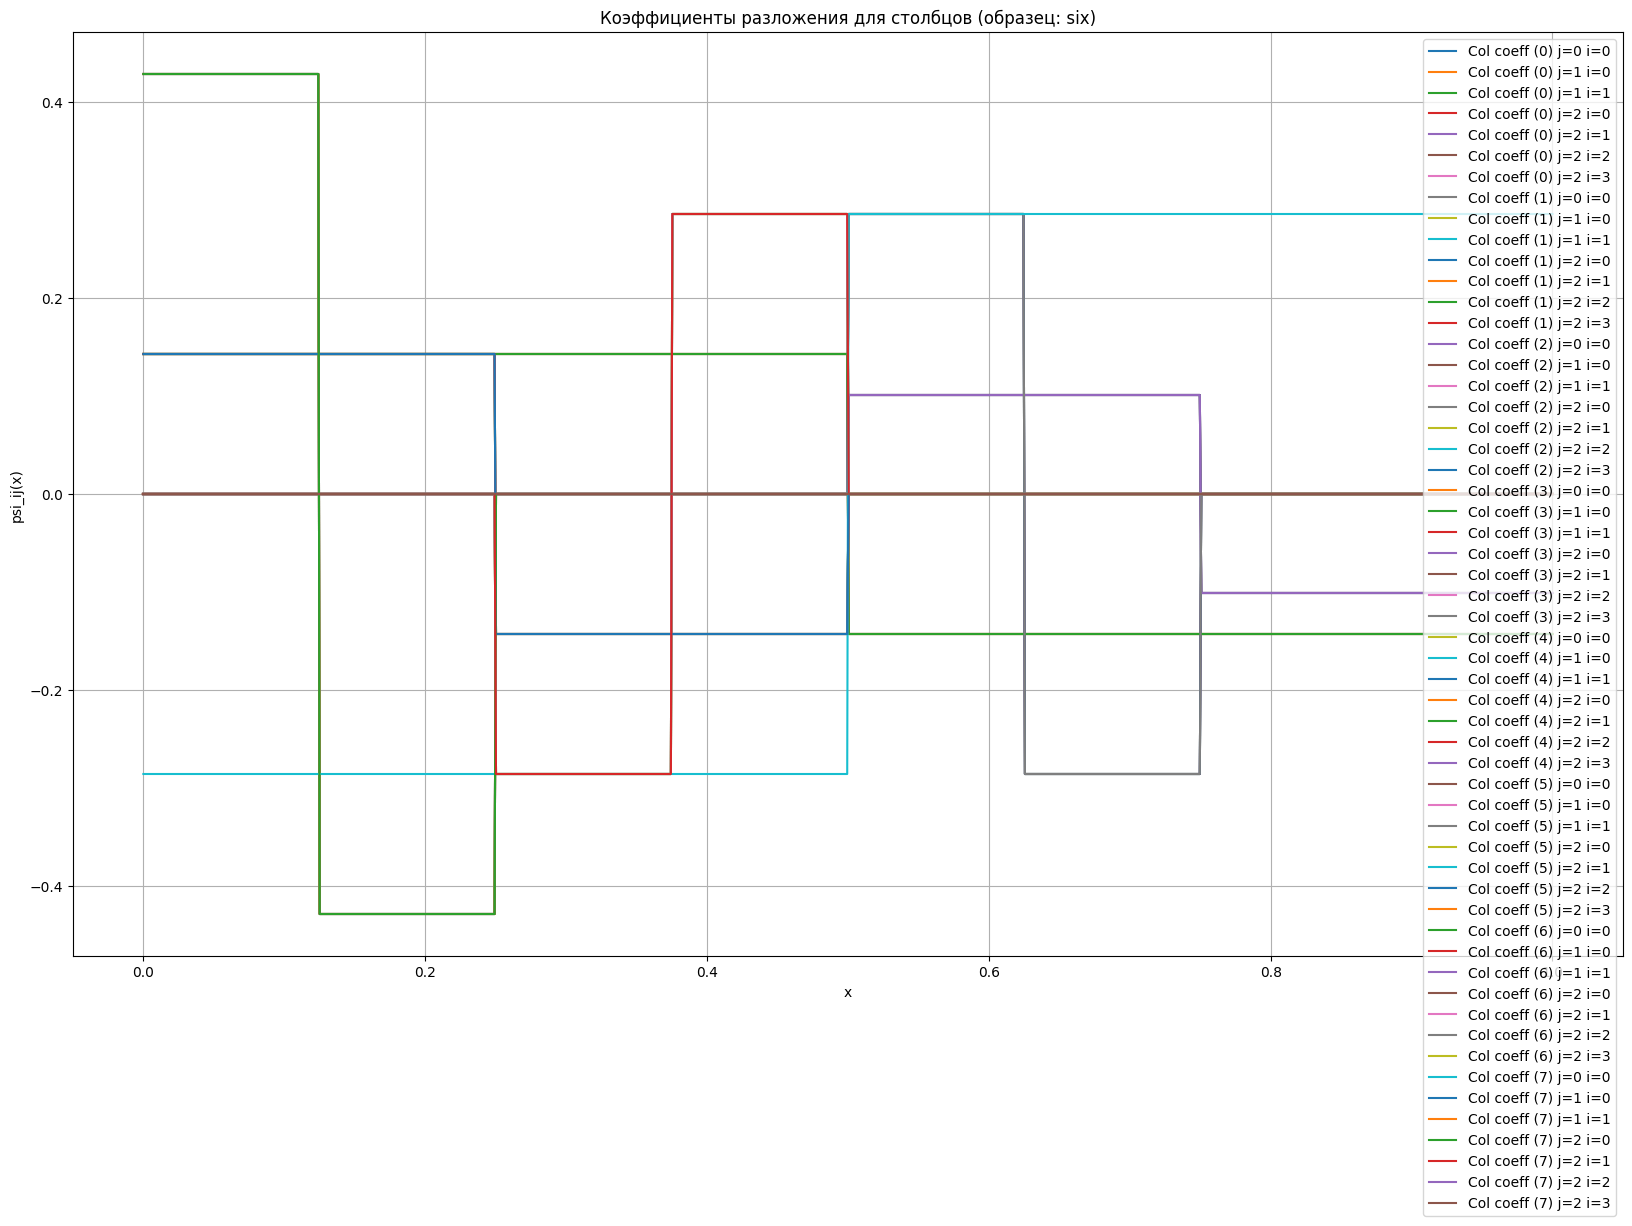

C:\Users\Ксения\AppData\Local\Temp\ipykernel_18704\4081193264.py:6: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral = quad(lambda x: f(x) * psi_ij(x, j, i), left, right)[0]


For seven sample row_coeffs is [{(0, 0): 0.0, (1, 0): 0.0, (1, 1): 0.0, (2, 0): 0.0, (2, 1): 0.0, (2, 2): 0.0, (2, 3): 0.0}, {(0, 0): -0.14285714285714288, (1, 0): 0.0, (1, 1): -0.20203050891044214, (2, 0): 0.0, (2, 1): 0.0, (2, 2): 0.0, (2, 3): -0.21428571428571433}, {(0, 0): -0.14285714285714302, (1, 0): 0.0, (1, 1): -0.10101525445522105, (2, 0): 0.0, (2, 1): 0.0, (2, 2): -0.07142857142857144, (2, 3): 0.21428571428571433}, {(0, 0): -0.14285714285714296, (1, 0): 0.0, (1, 1): 0.20203050891044222, (2, 0): 0.0, (2, 1): 0.0, (2, 2): -0.07142857142857138, (2, 3): 0.0}, {(0, 0): 0.0, (1, 0): -0.1010152544552211, (1, 1): 0.1010152544552211, (2, 0): 0.0, (2, 1): -0.1428571428571429, (2, 2): 0.1428571428571429, (2, 3): 0.0}, {(0, 0): 0.14285714285714296, (1, 0): -0.20203050891044222, (1, 1): 0.0, (2, 0): 0.0, (2, 1): 0.07142857142857138, (2, 2): 0.0, (2, 3): 0.0}, {(0, 0): 0.14285714285714302, (1, 0): 0.10101525445522105, (1, 1): 0.0, (2, 0): -0.21428571428571433, (2, 1): 0.07142857142857144, 

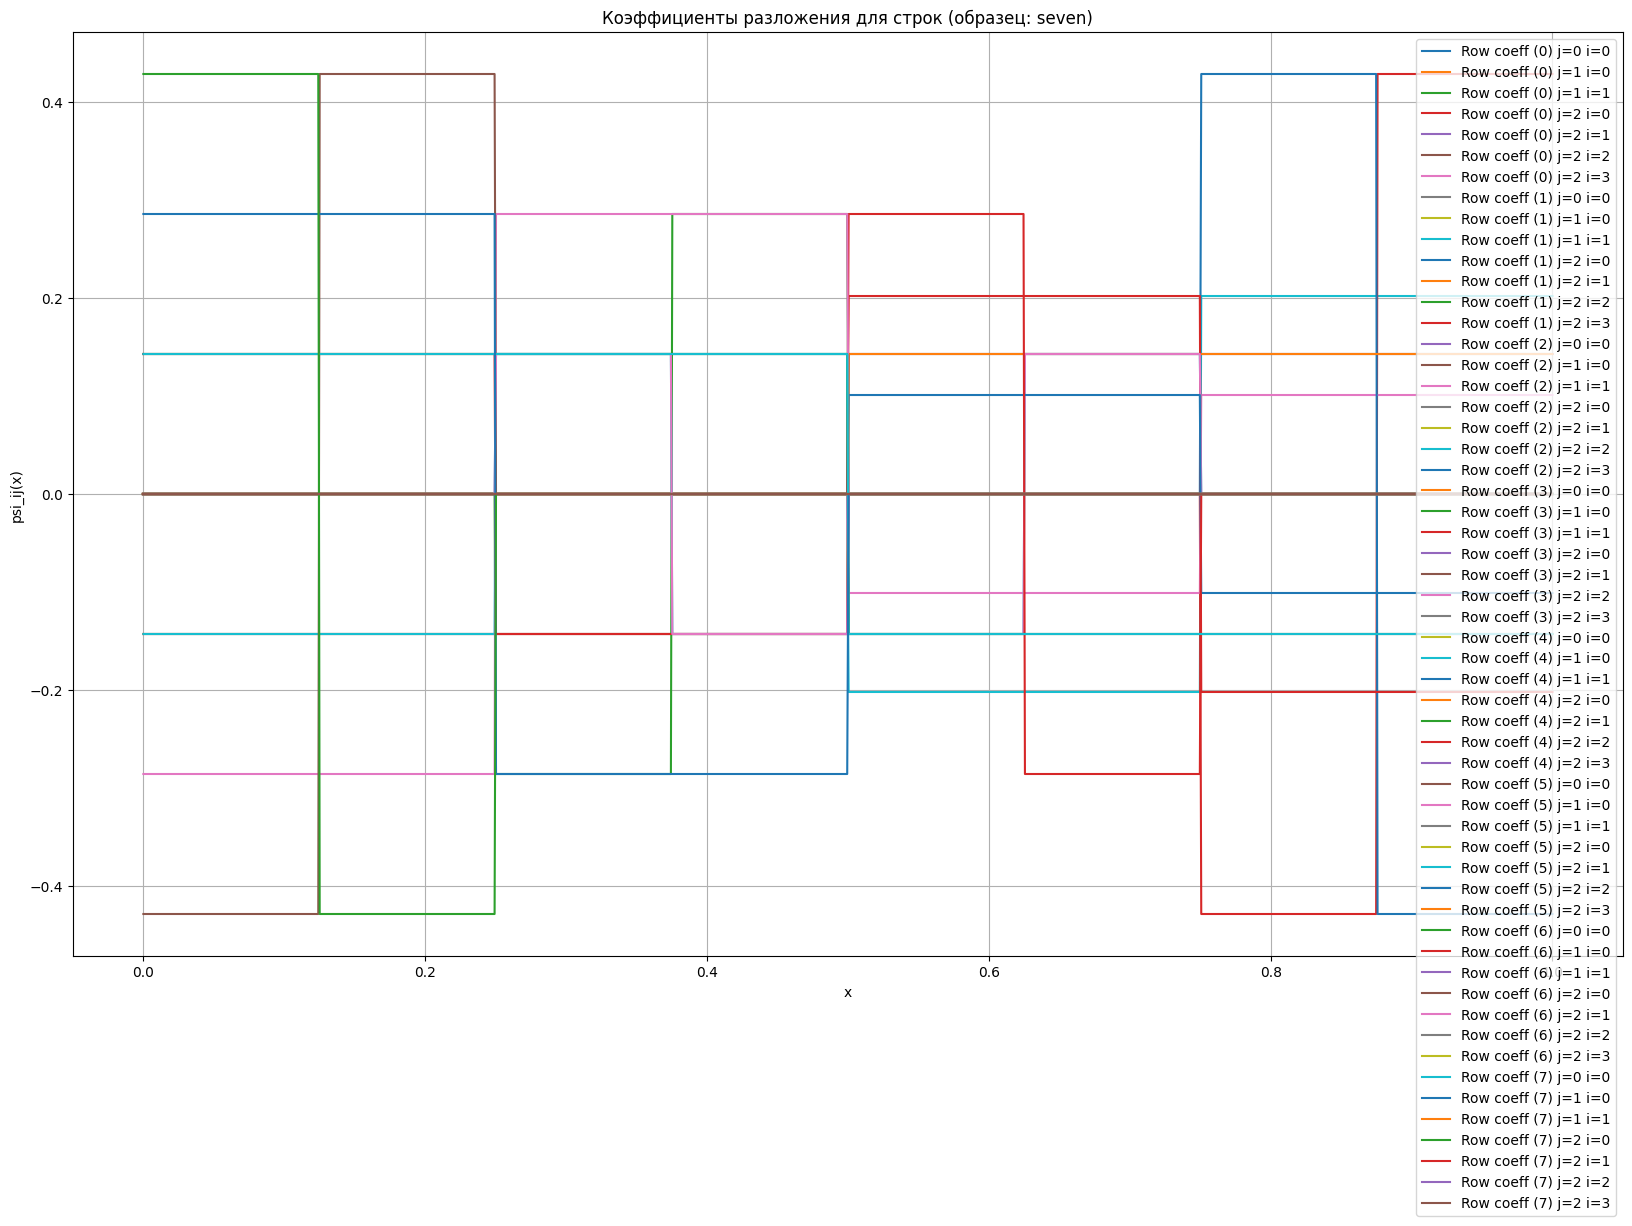

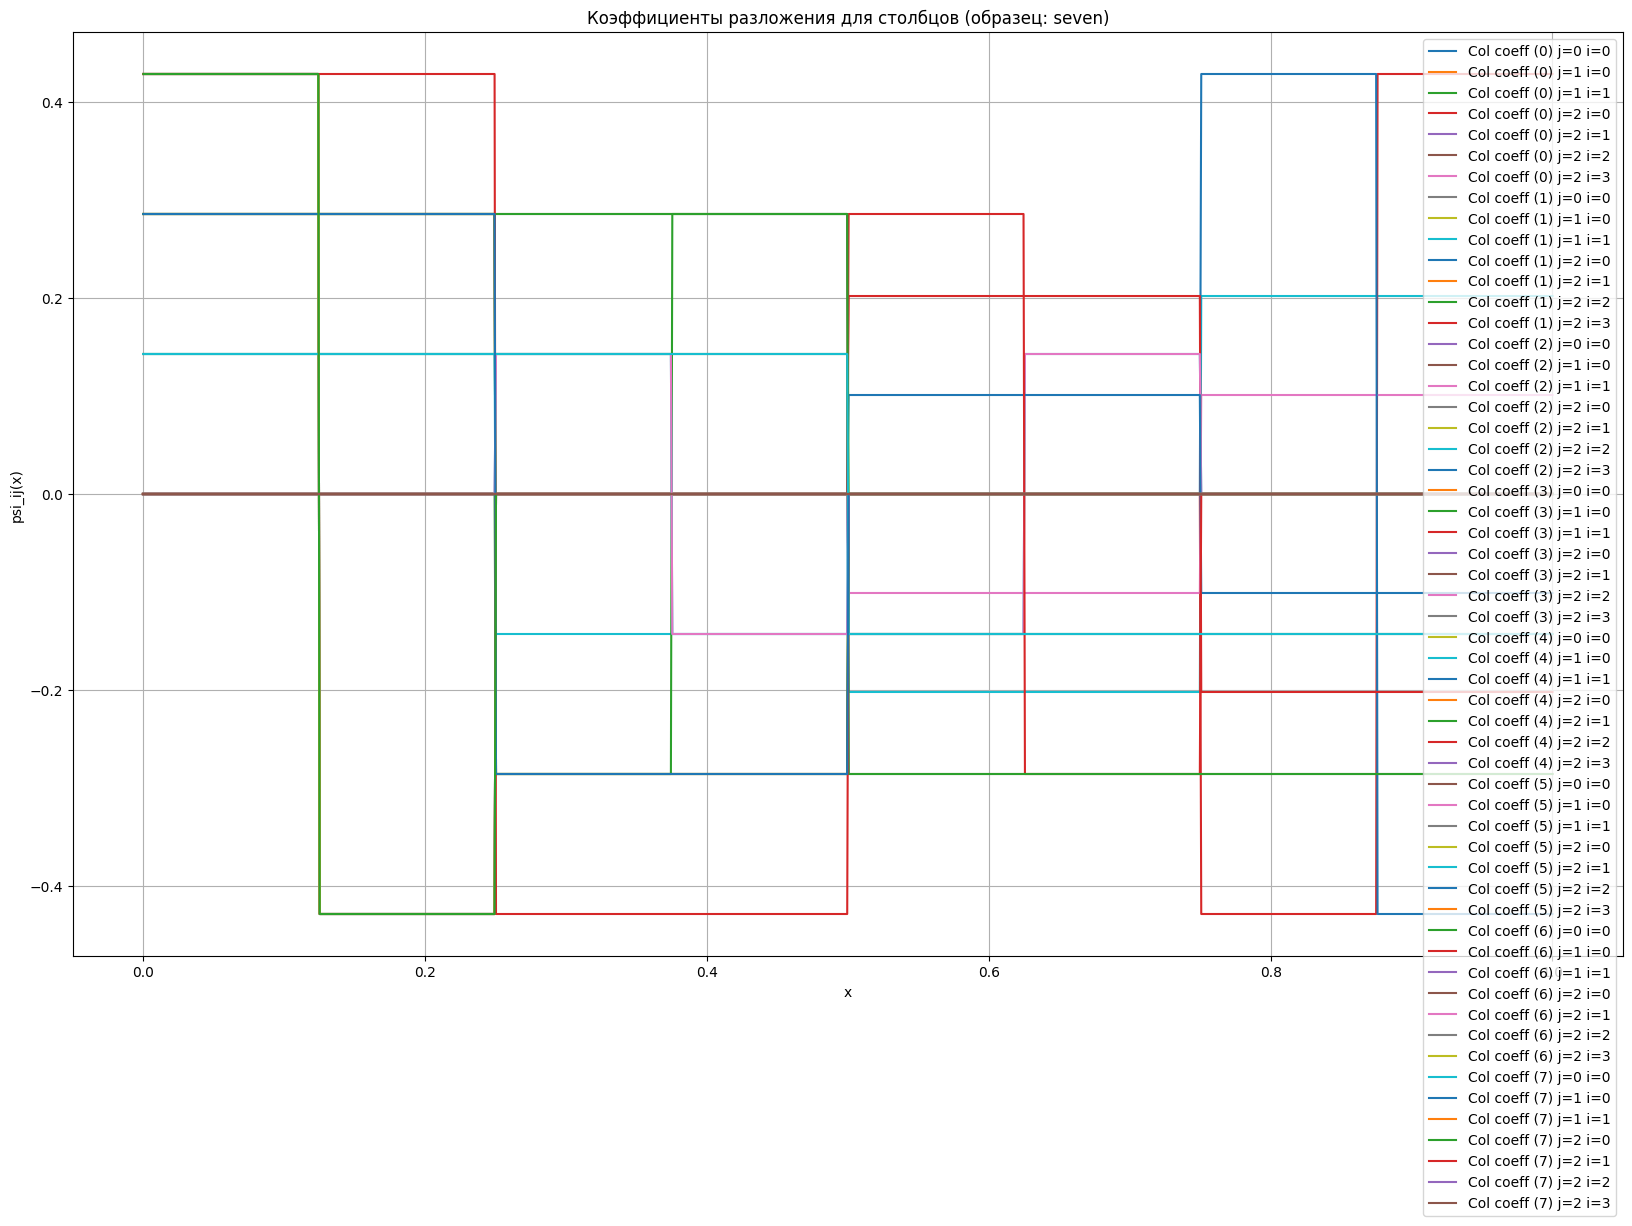

For four sample row_coeffs is [{(0, 0): 0.14285714285714288, (1, 0): 0.20203050891044214, (1, 1): 0.0, (2, 0): 0.21428571428571433, (2, 1): 0.0, (2, 2): 0.0, (2, 3): 0.0}, {(0, 0): 0.14285714285714288, (1, 0): 0.20203050891044214, (1, 1): 0.0, (2, 0): 0.21428571428571433, (2, 1): 0.0, (2, 2): 0.0, (2, 3): 0.0}, {(0, 0): 0.14285714285714288, (1, 0): 0.20203050891044214, (1, 1): 0.0, (2, 0): 0.21428571428571433, (2, 1): 0.0, (2, 2): 0.0, (2, 3): 0.0}, {(0, 0): 0.14285714285714288, (1, 0): 0.20203050891044214, (1, 1): 0.0, (2, 0): 0.21428571428571433, (2, 1): 0.0, (2, 2): 0.0, (2, 3): 0.0}, {(0, 0): 0.0, (1, 0): 0.0, (1, 1): 0.0, (2, 0): 0.0, (2, 1): 0.0, (2, 2): 0.0, (2, 3): 0.0}, {(0, 0): 0.0, (1, 0): 0.0, (1, 1): 0.0, (2, 0): 0.0, (2, 1): 0.0, (2, 2): 0.0, (2, 3): 0.0}, {(0, 0): 0.0, (1, 0): 0.0, (1, 1): 0.0, (2, 0): 0.0, (2, 1): 0.0, (2, 2): 0.0, (2, 3): 0.0}, {(0, 0): 0.0, (1, 0): 0.0, (1, 1): 0.0, (2, 0): 0.0, (2, 1): 0.0, (2, 2): 0.0, (2, 3): 0.0}]
For four sample col_coeffs is [{(

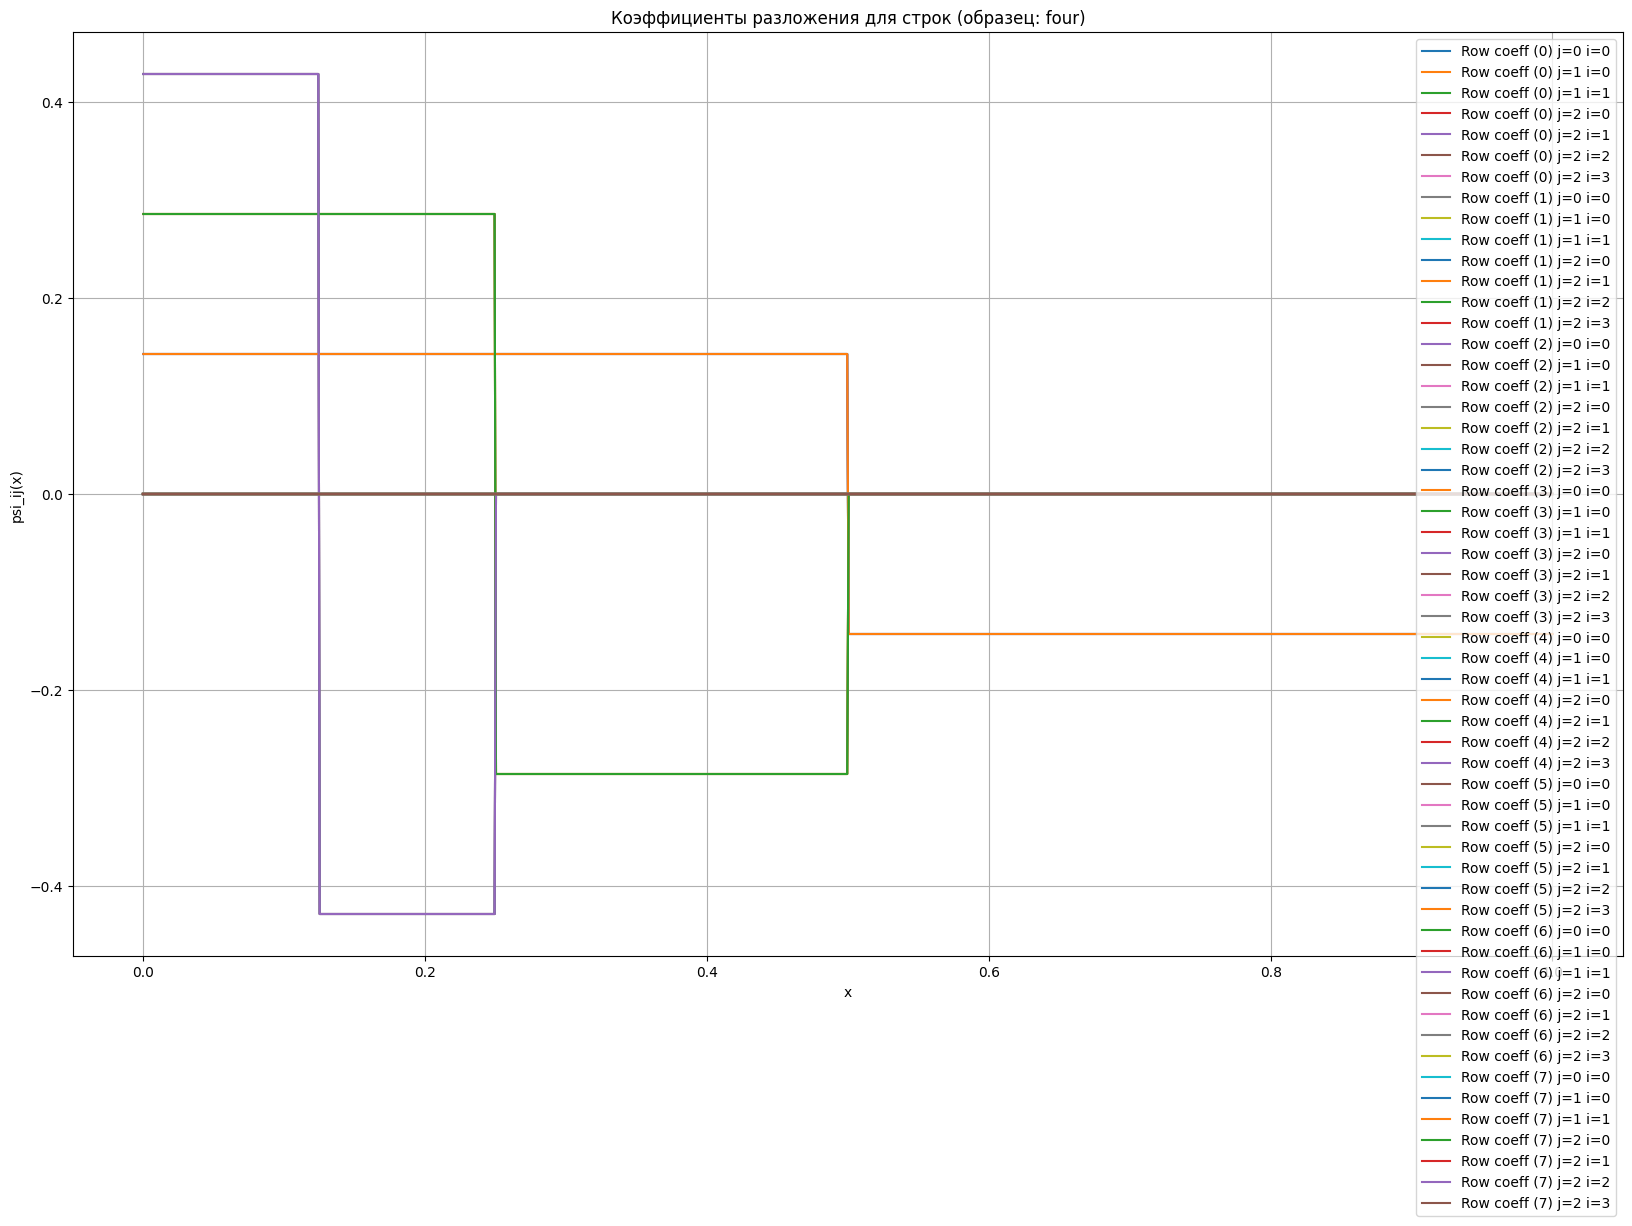

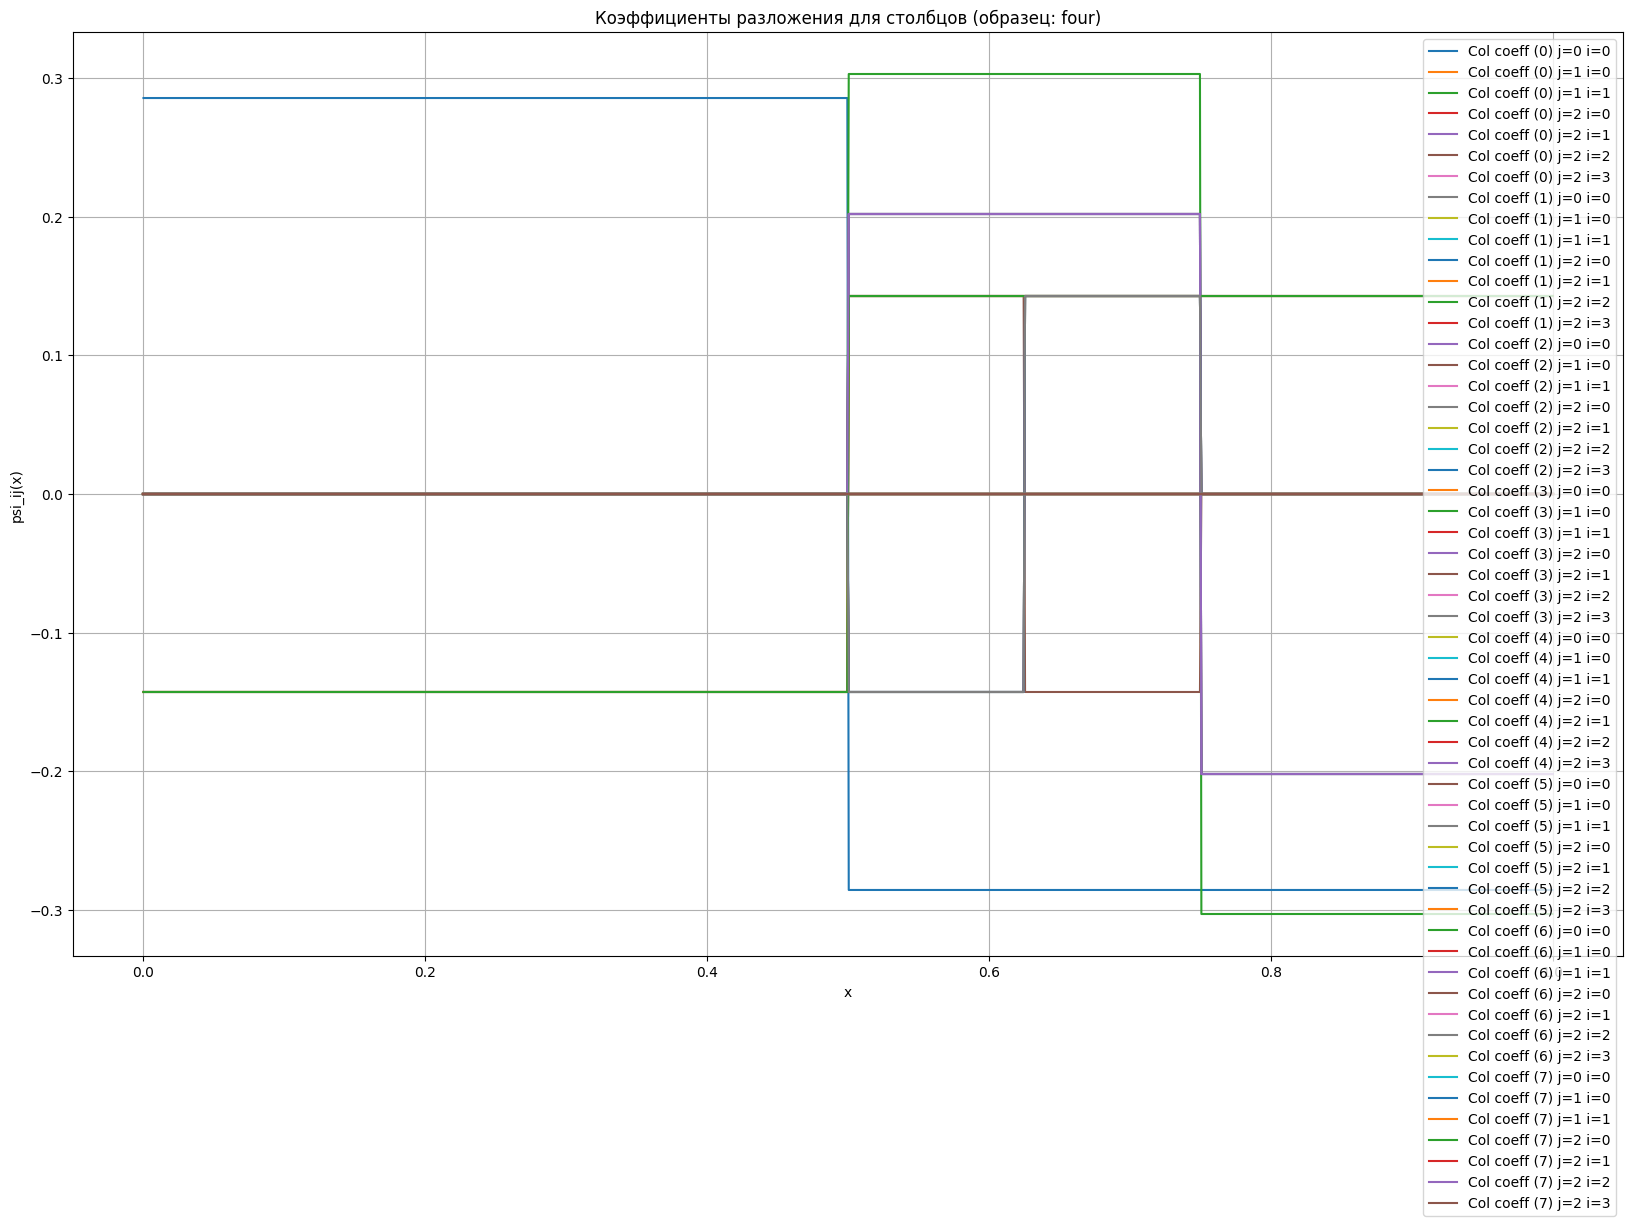

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Функция для визуализации коэффициентов вейвлетов
def plot_wavelet_coefficients(samples, j_max):
    # Для каждого образца
    for name, sample in samples.items():
        # Разложение для строк
        row_coeffs, col_coeffs = standard_decomposition(sample, j_max)

        print(f'For {name} sample row_coeffs is {row_coeffs}')
        print(f'For {name} sample col_coeffs is {col_coeffs}')
        
        # Графики для строковых коэффициентов
        x_vals = np.linspace(0, 1, 1000)  # 1000 точек для визуализации

        # Строковые коэффициенты
        plt.figure(figsize=(20, 12))
        for row_index in range(len(row_coeffs)):
            for j in range(j_max + 1):
                for i in range(2 ** j):
                    coeff_value = row_coeffs[row_index].get((j, i), 0)
                    psi_vals = np.vectorize(lambda x: psi_ij(x, j, i))(x_vals)
                    plt.plot(x_vals, coeff_value * psi_vals, label=f'Row coeff ({row_index}) j={j} i={i}') #coeff_value * ??? !!!
        
        plt.title(f'Коэффициенты разложения для строк (образец: {name})')
        plt.xlabel('x')
        plt.ylabel('psi_ij(x)')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Столбцовые коэффициенты
        plt.figure(figsize=(20, 12))
        for col_index in range(len(col_coeffs)):
            for j in range(j_max + 1):
                for i in range(2 ** j):
                    coeff_value = col_coeffs[col_index].get((j, i), 0)
                    psi_vals = np.vectorize(lambda x: psi_ij(x, j, i))(x_vals)
                    plt.plot(x_vals, coeff_value * psi_vals, label=f'Col coeff ({col_index}) j={j} i={i}')
        
        plt.title(f'Коэффициенты разложения для столбцов (образец: {name})')
        plt.xlabel('x')
        plt.ylabel('psi_ij(x)')
        plt.legend()
        plt.grid(True)
        plt.show()

# Выполним разложение и визуализацию
plot_wavelet_coefficients(samples, j_max)
